# Lesson 2: Gradient Descent and Loss Functions
Motivation: Users should be familiar with the generalized Machine learning process in a simple form

High Level Goal: understand intuition behind "fitting a model"

Machine learning can be (sort of) broken down into three steps: 1) make a prediction, 2) evaluate how effective prediction is, 3) adjust prediction as necessary. Today, we will look at steps 2 and 3.

To evaluate a machine learning algorithm, we will need to understand the concepts of Loss and Gradient Descent. If possible, it will be good for you to review anything you know about linear algebra and multivariable calculus. If you know nothing about these things though, do not worry - this will be explained in a comprehensive way.

**Gradient Descent** is a type of optimization function. The idea here is that you can tell the machine how to improve on its predictions based on feedback from the performance of the algorithm. We can do this by applying some very powerful calculus techniques.

The way gradient descent works at a basic level is that it uses the results of some loss function (often denoted with J) and uses it to decide how to improve our prediction. A **Loss function** is a function that takes in the prediction based on some specific parameter, compares this prediction to the actual value with this parameter, and then decides if the prediction needs to be adjusted. This sounds very involved - however, you will find that modelling relations with mathematics ends up being quite straightforward.

Now, The way that we will discuss these techniques is through applying them through a fictitious example. We will be looking at the relationship between shark sightings and number of ice cream stands. It turns out that sharks like math just as much as they like ice cream. In the summer, it is shown that the direct relation between shark appearances and the number of ice cream stands in the area can be classified as a linear function, namely:
    $$
        y = 2*x - 7
    $$
where y is the number of shark sightings and x is the number of ice cream stands.

Our goal will be to design an algorithm that is fully capable of "predicting" the number of shark sightings according to the number of ice cream stands in an area. We will employ Gradient Descent to do this.

First of all, we want to cover the necessary imported libraries. We will use functions from here to implement our code. 

The first is numpy. This is great for doing any sort of math stuff in python - regardless of whether it is linear algebra math or calculus related math. It is a super dynamic library, and I would recommend that all should try to get as familiar with this library as they can.

The next is matplotlib. We will often use this to plot our graphs. Note that we use other libraries on top of this one.

Nex is the random library. While this seems like a silly import, the fact is that we cannot do a lot of the simulations that we like to do without this library.

NOTE: we use these libraries often, so keep note of them! Also note, we will eventually introduce libraries that are actually machine learning libraries - specifically PyTorch.


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

Next, lets talk data. Normally in machine learning, there is a dataset that we would import. However, in this situation, we can generate a dataset of 100 points corresponding to the function y = 2*x - 7 between x = 1 and x = 100.

In [2]:
## load data, initial predictions (random). 400 x values between 1 and 20.
# we can use numpy's built in feature to create 2 arrays - one for a set of input values (x), and the corresponding outputs (y)
x = np.linspace(1,100, 100)
y = np.array(2*x - 7)



It is important to visualize the data in some way. We do this so that the user is aware of all of the features of the data before they go and start working with it. This is an important technique that I advise all members to employ - sometimes, this is the key missing part that is what is making your algorithm constantly break!

This will output the fist 20 values of x and y. It will also print the size of both. There should be the same number of x values as y values.

In [3]:
## show first 20 values of each. In order to be a good data analyst, it is highly advised to view the data before performing any machine learning!
# we use print functions to show text in the output window.
print(y[1:20])
print("length of y: ", len(y))
print(x[1:20])
print("length of x: ", len(x))
print(max(y))

[-3. -1.  1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31.
 33.]
length of y:  100
[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20.]
length of x:  100
193.0


Next, we can initialize some random variables for the machine learning algorithm to start with as predictions. We do this by storing the values in pred_orig. We do this so that we have a clear dataset to always go back go as necessary.

Note how in the x values, y values and predictions we will have the same number of values. This means that for every x value, which is corresponding to number of ice cream stands, there is a certain number of predicted shark sightings. We will also output the first sample here - this will correspond with the number of shark sightings when there is only 1 ice cream stand.

We will also visualize the predictions. Note how the highest predicted value doesn't go above the highest y value - this is intentional!

Also, try to understand what each function is actually doing. The way that you can do this is by searching up documentation on the web about these functions. Pretty much anywhere you search up will give relevant information about this.

54.4407472018004
length of predictions:  100
number of ice cream stands: 1.0
number of shark sightings predicted: 54.4407472018004


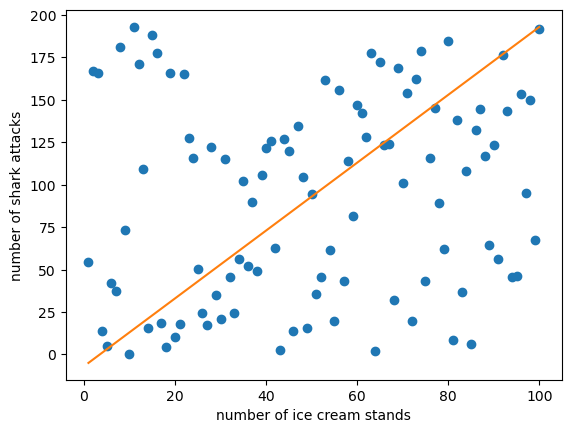

In [4]:
## Now, we will generate a set of predicted values. We can thik of these as random guesses that we will compare with the actual value. From this comparison,
## we will figure out how to adjust our intitial guesses.
# Again, we can use numpy's embedded "random" library to generate a bunch or random values. We will then plot them to make more sense of the values.
pred_orig = max(y) * np.random.random(100)
prediction = pred_orig
print(prediction[0])
print("length of predictions: ", len(prediction))
plt.plot(x,prediction, "o",x,y)

print("number of ice cream stands: %s" % x[0])
print("number of shark sightings predicted: %s" % prediction[0])

plt.xlabel("number of ice cream stands")
plt.ylabel("number of shark attacks")

plt.show()

Now is the process of computing loss and performing gradient descent. Normally, we would find the loss and then compute a gradient. However, the loss is really only dependent on one value - specifically, the error of (predicted - y). If we take the derivative of the loss with respect to this error, then we will be essentially computing the gradient! NOTE: this gets much more complicated when we do this for loss functions dependent on multiple variables.

Recall from the lecture; the loss can be computed as the square of the diference of the prediction and the true value. In order to know the direction of the minimum loss, we take the negative gradient of the function. Fortunately for us, because the function is only dependent on one variable, this is easy - just take the derivative with respect to x!

We will visualize two things here - one will be the process of gradient descent, and the other will be the loss function over time.

First, we ought to initialize some important variables. These will be used to store values and perform computations. Let's ake a good look at them...

The loss_step variable gives us our adjustment that will occur during gradient descent [more on this later]. For now, all that you need to understand is that the important math will be done with this specific step.

The loss is the loss for each step. This, as we will soon observe, is NOT the same as the loss step. However, it will be used to understand and visualize how the algorithm improves over time.

the residuals are the difference of the true y and predicted y values. We will compute this for 3 different iterations.

The learning rate is a value that is very important in gradient descent. It will decide how rapidly gradient descent occurs, as well as how accurately.

The loss_total is exactly that - it will store the total loss for each set of iterations.

Finally, the loss_100 will be used to store information about the performance of the algorithm in general. We will use this to display the loss over time.

In [5]:
loss_step = np.ones(100)
loss = np.zeros([100,3])
loss_test = np.zeros(3)
learning_rate = 0.02
loss_total = np.ones([1,3])
loss_100 = np.zeros([100,100])

Now, the hard part. We will discuss gradient descent here, as well as loss functions.

First of all, lets look at the Loss function. This is a function that will penalize an algorithm when its predictions are off. Preferrably, it will penalize the algorithm the more the predictions are off. There are many examples of Loss functions - however, we will look into the Binary Cross Entropy Loss. For this function, the loss is:
    $$
        J = \frac{1}{n} * \frac{1}{2} * \sum^n[prediction - y]^2
    $$
Where J is the loss, "prediction" and y are both vectors of the same size, and n is the total number of key values that will be iterated over.
Let's pick this algorithm apart. the value "prediction - y" gives the distance between the predicted value and the actual value. The squaring term makes this value positive. This will be value for a reason discussed later.
Note how the algorithm is a summation. Normally, we compute this loss for many different curves. However, for our purposes in this tutorial, we will compte the loss for only individual points, for the purpose of understanding the moving parts.
Finally, we have a 1/n term to normalize the output. The idea is that this loss ends up being an average loss, rather than a huge summation. Assuming that there are many different points, this will result in a much more reasonable adjustment. Again, for our purposes in the tutorial, we will not consider this. However, in traditional algorithms, both the summation and the normalization must be performed.

You might notice that 1/2 part wasn't discussed. It will be discused. This is actually a term that makes gradient descent a little more efficient.

This is great and all, but what does this do for us? Well, we can use the Loss function not only to tell our algorithm how effective it is, but also how we can change our prediction. We do this using another function called gradient descent. This will take the Loss as an argument and shift the prediction in the direction that minimizes the loss. It does this by adding a scaled gradient of the loss to the prediction. To understand the gradient of the loss, you can think of it as a step in the direction of highest loss. If we negate this value, we will be stepping in the direction of least loss. Essentially, we end up using the Loss to tell us what direction we ought to go in to minimize the loss.
the loss function is as follows:
    $$
        prediction_1 = prediction_0 - \alpha * \nabla*J.
    $$
This is equivalent to:
    $$
        prediction_1 = prediction_0 - \alpha * \frac{dJ}{d\sigma},
    $$
where the sigma is 
    $
        prediction - y,
    $
and alpha is called the learning rate. This decides the size of the steps taken in Gradient Descent.
NOW we can see why the 1/2 term was important - when we took the derivative, the 2 from the square term gets dropped, and it will cancel out the 1/2 part. This also makes the code much easier to read!

Note that this process is something that goes over how the algorithm might take *one* step in the right direction. However, if we keep going this, it stands to reason that the algorithm will continue to "step" in the correct direction, closer and closer to the true value. This indicates that we ought to do this process many many times to improve performance.

In [6]:
for num_repeats in range(100): # 100 iterations

    for i in range(0,100):

        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,0] = (prediction[i] - y[i])**2
        loss_test[0] = loss_test[0] + loss[i,0]
        loss_total[0,0] = loss_total[0,0] + loss[i,0]
        loss_100[i,num_repeats] = (prediction[i] - y[i])**2
        
    prediction = -loss_step * learning_rate + prediction

loss_total[0,0] = np.sum(loss[:,0])

Now, we will display all of the results. There will be three graphs. One graph will show the comparisons versus the predicted number of shark attacks and the actual number of shark attacks. Note that the predictions will still be individual points on a graph. The next graph is one plotting the loss versus the number of ice cream stands. Essentially, this will plot the final loss for each of the data points. Finally, the last graph will plot the loss for one specific sample over the iterations. 

This is not all that will be shown as output. We will display the total loss from this whole process.

3533.202427908342


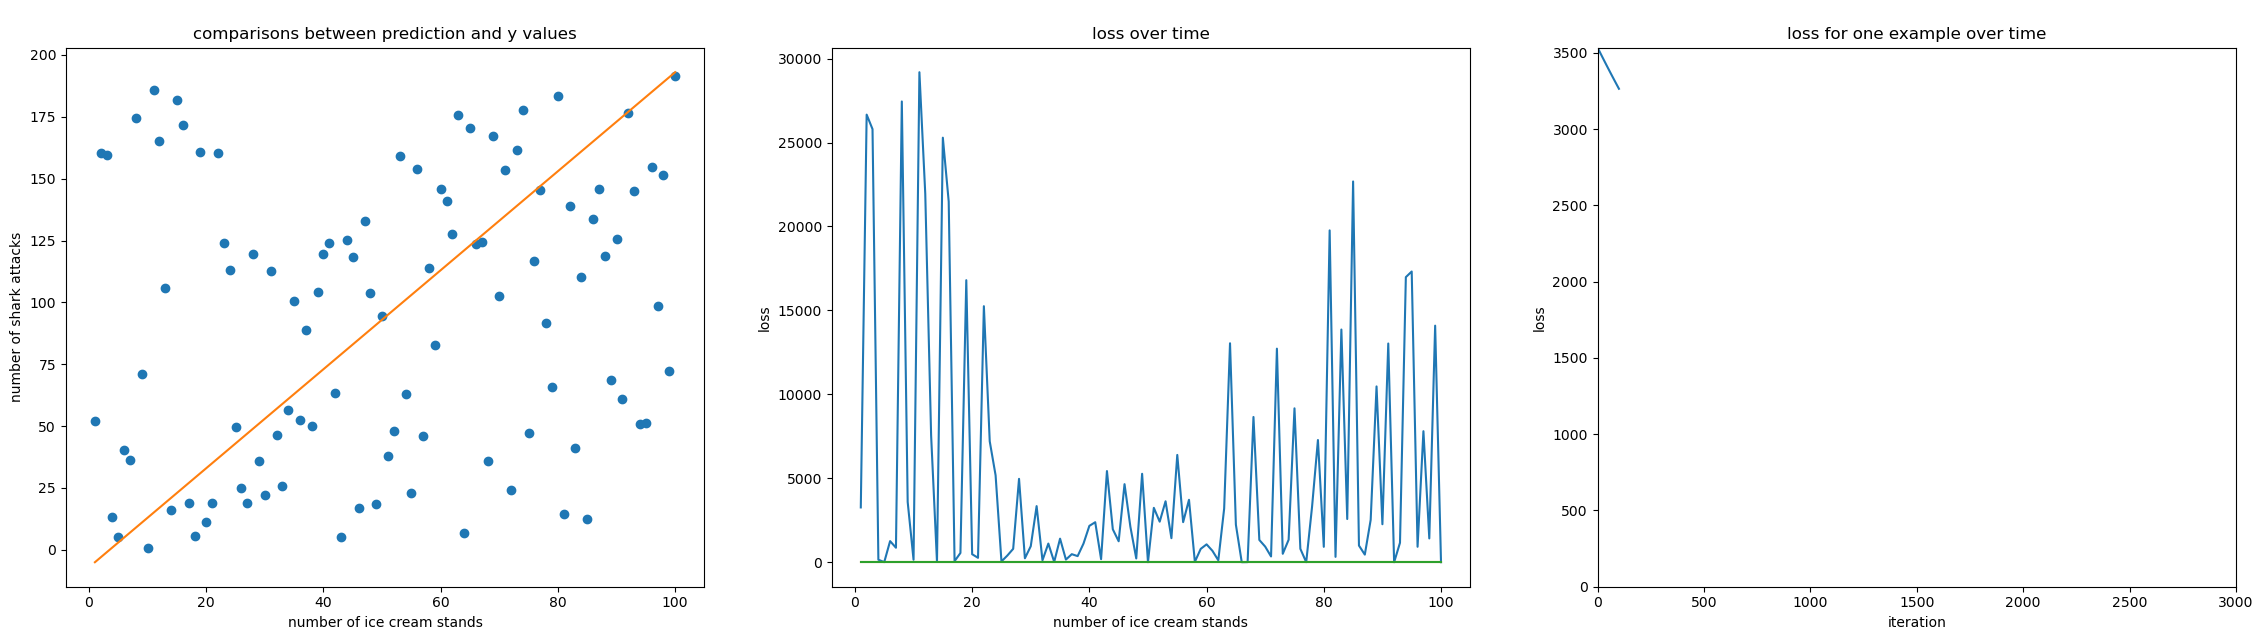

loss of iteration 1: 521888.16546589165


In [7]:
loss_total[0,0] = np.sum(loss[:,0])
# plot graphs: left is prediction vs x, right is loss over time
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax2.plot(x,loss)
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
ax3.plot(np.linspace(0,100,100),loss_100[0,:])
print(loss_100[0,0])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,3000)
ax3.set_ylim(0,max(loss_100[0,:]))
# Show the plot
plt.show()

print("loss of iteration %s: %s" % (1,loss_total[0,0]))

.... and again....

C:\Users\ethan\AppData\Local\Temp\ipykernel_26028\508670154.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax2.legend(handles,labels=["100 iter","1000 iter"])


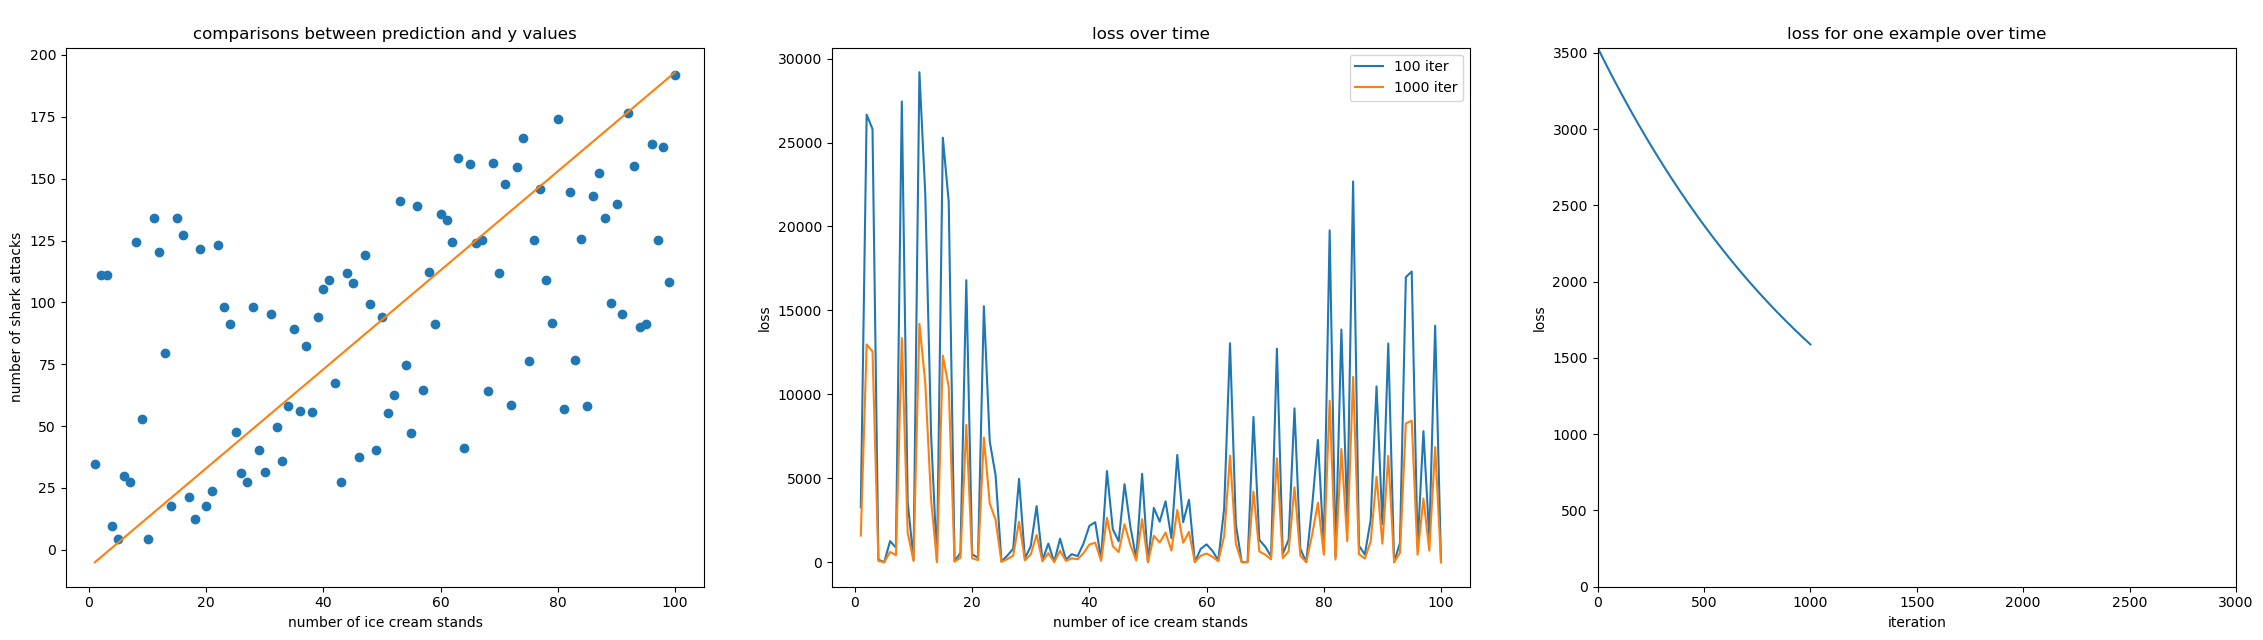

1th loss: 521888.16546589165
2th loss: 253993.65442187572


In [8]:
prediction = pred_orig
loss_1000 = np.zeros([100,1000])

for num_repeats in range(1000):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,1] = (prediction[i] - y[i])**2
        loss_total[0,1] = loss_total[0,1] + loss[i,1]
        loss_1000[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,1] = np.sum(loss[:,1])

# plot graphs: left is prediction vs x, right is loss over time

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.plot(x, prediction,'o',x,y)
ax1.set_title('comparisons between prediction and y values')
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax2.plot(x,loss[:,0],x,loss[:,1])
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels=["100 iter","1000 iter"])
ax3.plot(np.linspace(0,1000,1000),loss_1000[0,:])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,3000)
ax3.set_ylim(0,max(loss_100[0,:]))
# Show the plot
plt.show()

for iter in range(0,2):
    print("%sth loss: %s" % (iter+1,float(loss_total[0,iter])))

.... and again!

C:\Users\ethan\AppData\Local\Temp\ipykernel_26028\2979525846.py:27: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax2.legend(handles,labels=["100 iter","1000 iter", "3000 iter"])


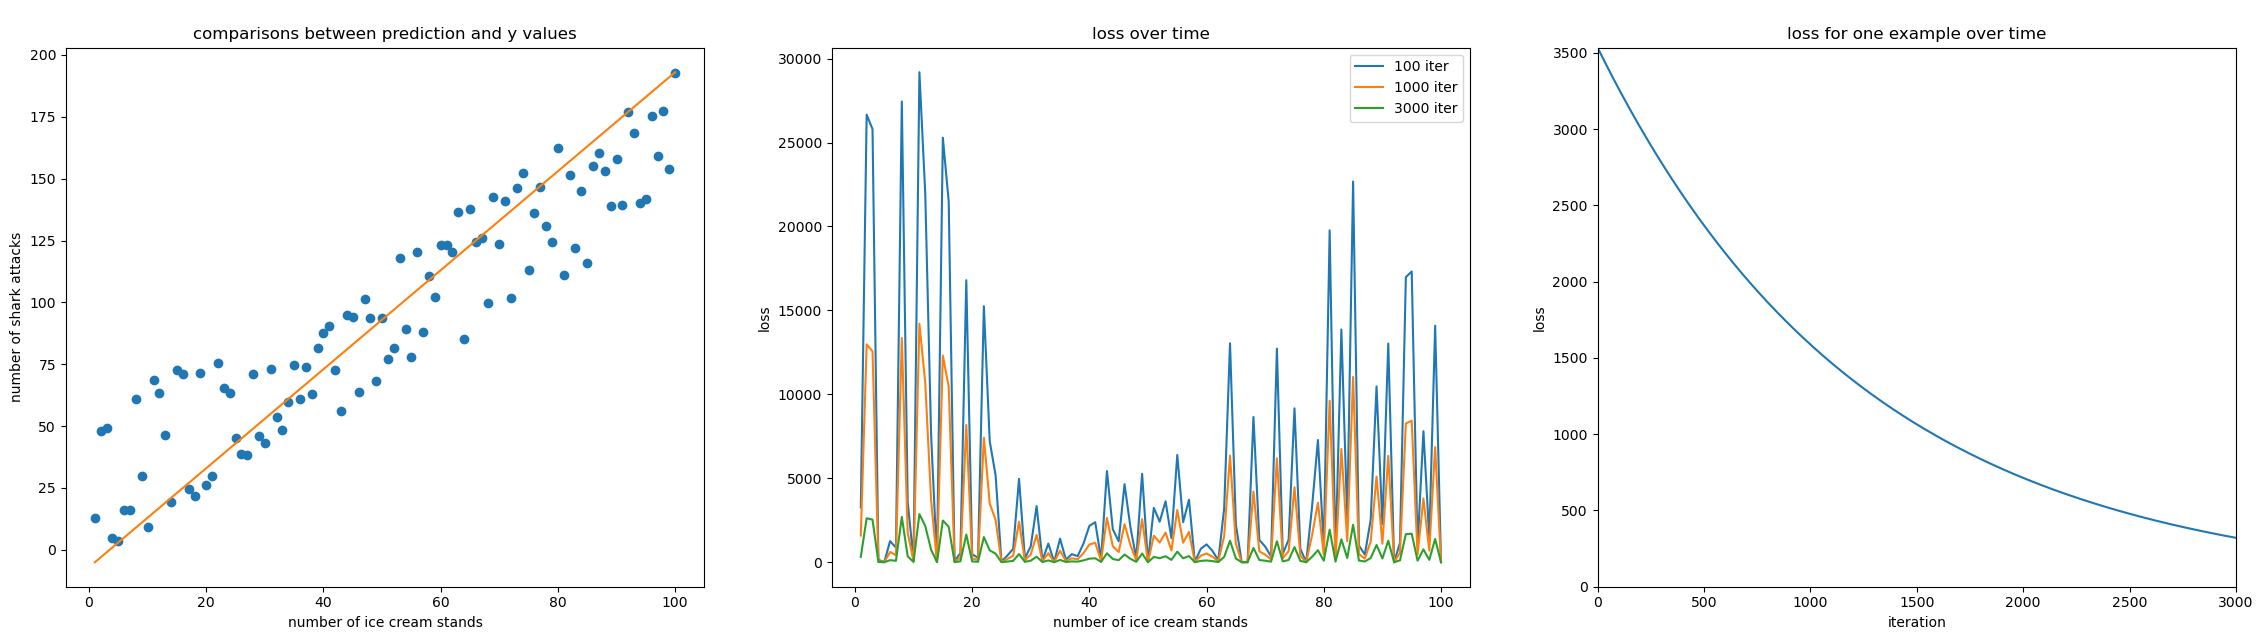

1th loss: 521888.16546589165
2th loss: 253993.65442187572
3th loss: 51264.02293093516


In [9]:
prediction = pred_orig
loss_3000 = np.zeros([100,3000])

for num_repeats in range(3000):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,2] = (prediction[i] - y[i])**2
        loss_total[0,2] = loss_total[0,2] + loss[i,2]
        loss_3000[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,2] = np.sum(loss[:,2])

# plot graphs: left is prediction vs x, right is loss over time

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax2.plot(x,loss[:,0],x,loss[:,1],x,loss[:,2])
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
handles,labels = ax2.get_legend_handles_labels()
ax2.legend(handles,labels=["100 iter","1000 iter", "3000 iter"])
ax3.plot(np.linspace(0,3000,3000),loss_3000[0,:])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,3000)
ax3.set_ylim(0,max(loss_100[0,:]))
# Show the plot
plt.show()

for iter in range(0,3):
    print("%sth loss: %s" % (iter+1,float(loss_total[0,iter])))


What are some things that we can take away from this?

Well, let's first observe the top graphs (comparisons between prediction and y values). The predictions correspond to the blue line, while the true y value is the orange line. See how the distance between the prediction and the actual y value gets closer and closer?

This is reflected directly in the graph of the residuals as well as the losses. Notice how the magnitude of the residuals, and thus the loss, is decreasing with increasing number of iterations. This is no surprise - with each iteration, we get closer and closer to the minimum loss for each data point.


This seems great! It looks like if I want to get the most accurate results in machine learning, I ought to just repeat things as much as possible. Sadly, this is not the case. It should be noted that typical machine learning algorithms have a TON more computations involved. Here, it is just a problem of calculating a difference and squaring that value - there is absolutely no difficult computation. On the other hand, typical machine learning algorithms can get so complex that it takes HOURS to run. Suddenly, increasing the number of iterations doesn't seem like such a great idea.

One solution to this is by increasing the learning rate, also known as the greek symbol 'alpha.' This dictates how fast we "descend" in gradient descent.

In the next few examples, we will vary the value of alpha, and then show the effect on the algorithm. Observe how increasing alpha improves performance, but only up till a point...

3533.202427908342


(0.0, 3533.202427908342)

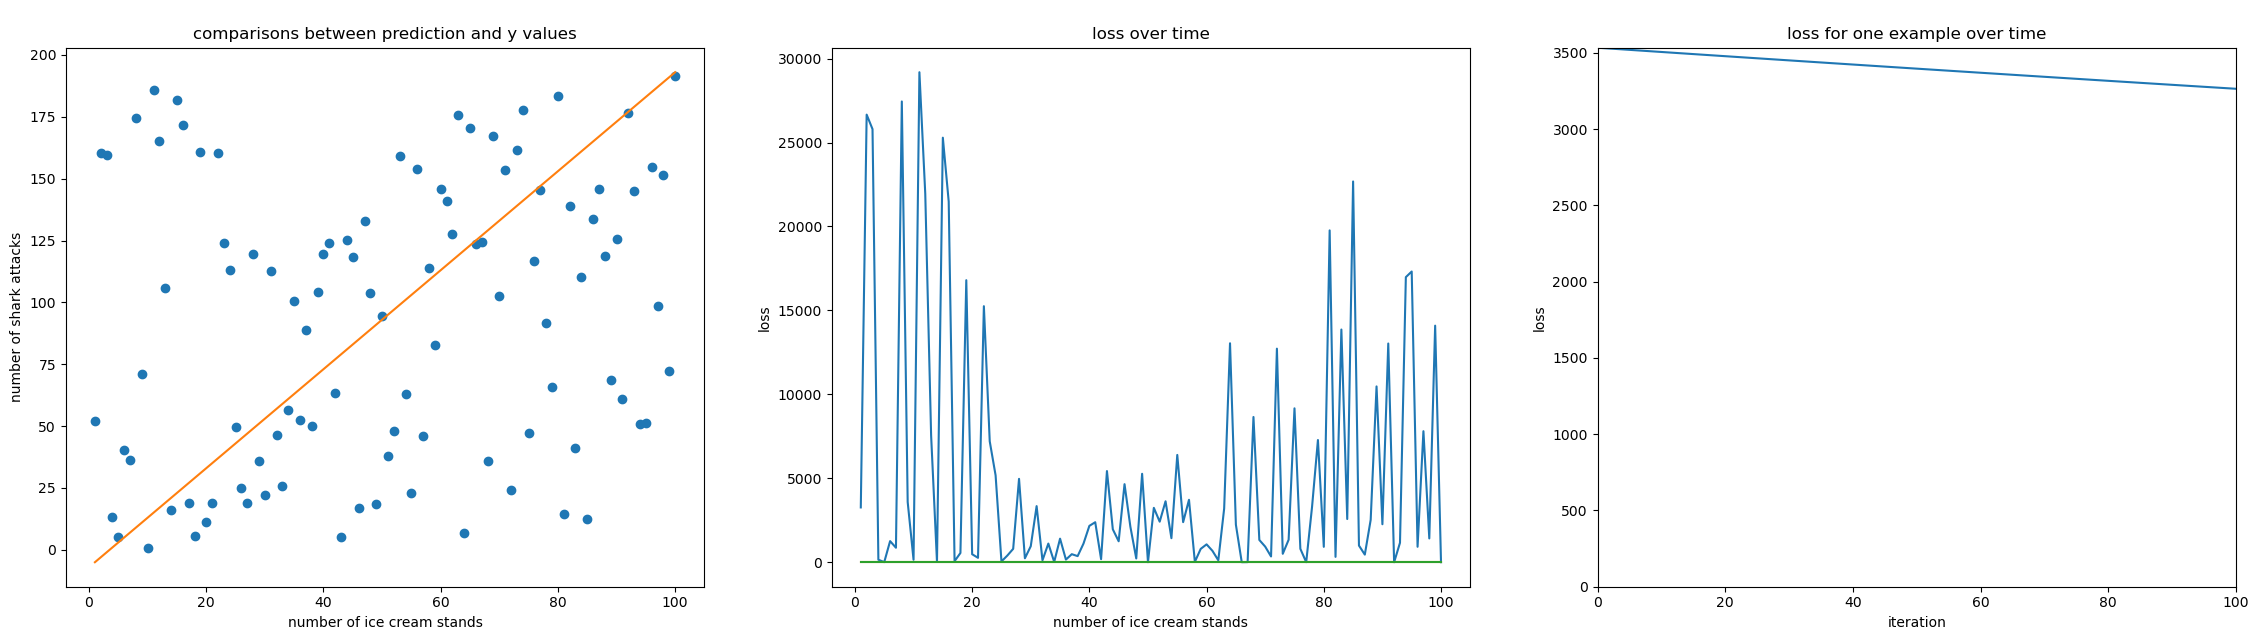

In [10]:
prediction = pred_orig

# compute loss, adjust prediction; loss = (prediction value - actual value) squared

# initialize variables
loss_step = np.ones(100)
loss = np.ones([100,3])
residuals = np.ones([100,3])
learning_rate = 0.02


for num_repeats in range(100):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,0] = (prediction[i] - y[i])**2
        loss_test[0] = loss_test[0] + loss[i,0]
        loss_total[0,0] = loss_total[0,0] + loss[i,0]
        loss_100[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,0] = np.sum(loss[:,0])
# plot graphs: left is prediction vs x, right is loss over time
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax2.plot(x,loss)
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
ax3.plot(np.linspace(0,100,100),loss_100[0,:])
print(loss_100[0,0])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,100)
ax3.set_ylim(0,max(loss_100[0,:]))

3533.202427908342


(0.0, 3533.202427908342)

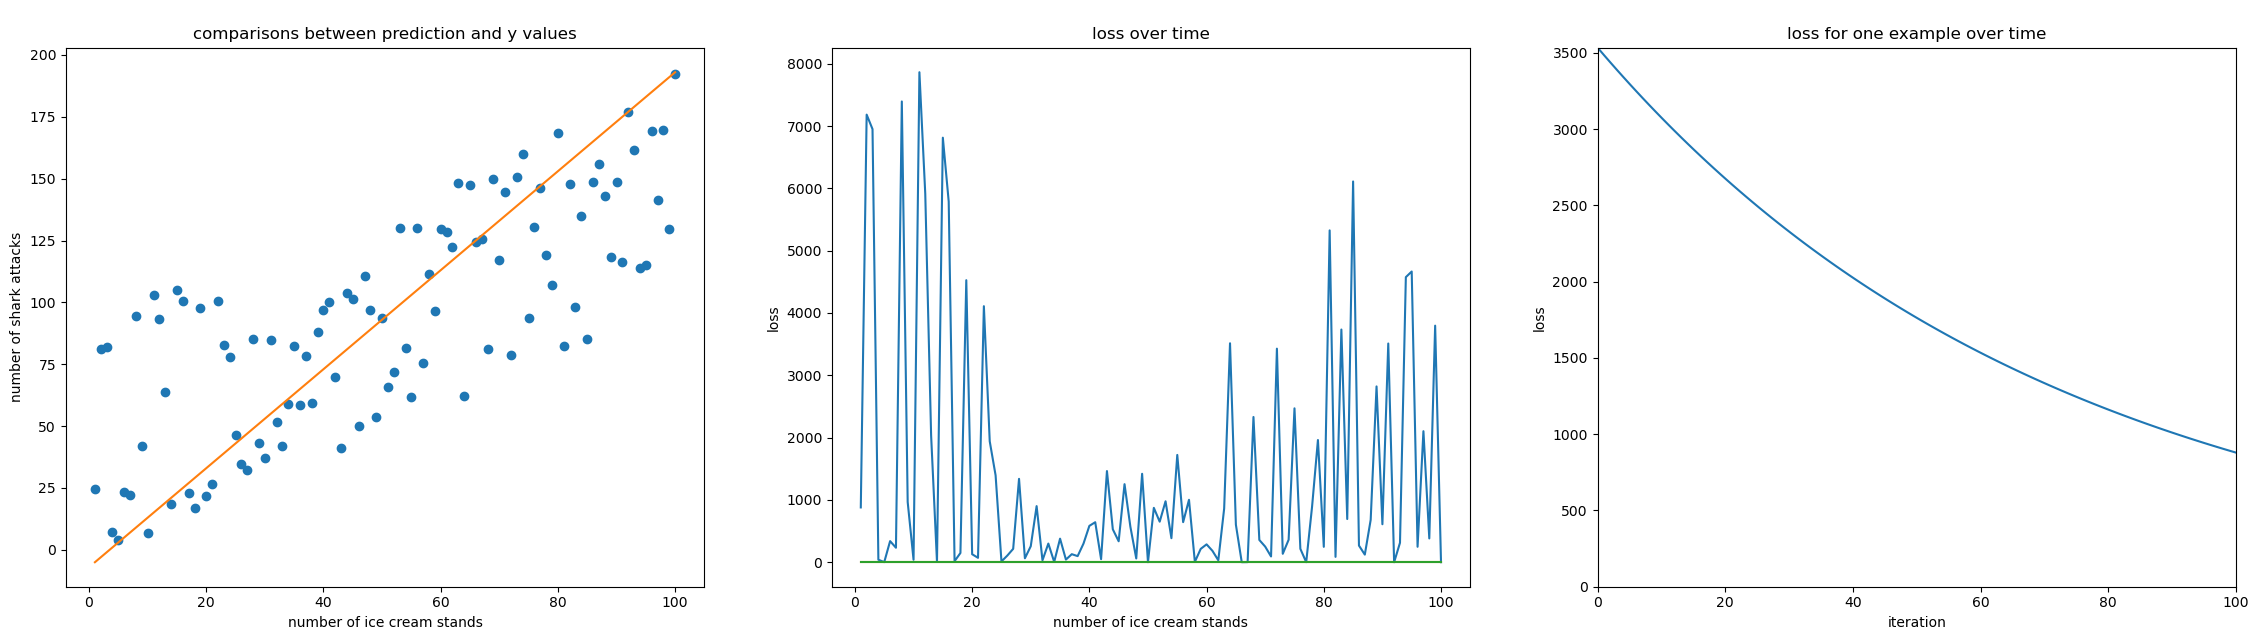

In [11]:
prediction = pred_orig

# compute loss, adjust prediction; loss = (prediction value - actual value) squared

# initialize variables
loss_step = np.ones(100)
loss = np.ones([100,3])
residuals = np.ones([100,3])
learning_rate = 0.35

for num_repeats in range(100):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,0] = (prediction[i] - y[i])**2
        loss_test[0] = loss_test[0] + loss[i,0]
        loss_total[0,0] = loss_total[0,0] + loss[i,0]
        loss_100[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,0] = np.sum(loss[:,0])
# plot graphs: left is prediction vs x, right is loss over time
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax2.plot(x,loss)
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
ax3.plot(np.linspace(0,100,100),loss_100[0,:])
print(loss_100[0,0])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,100)
ax3.set_ylim(0,max(loss_100[0,:]))


3533.202427908342


(0.0, 3533.202427908342)

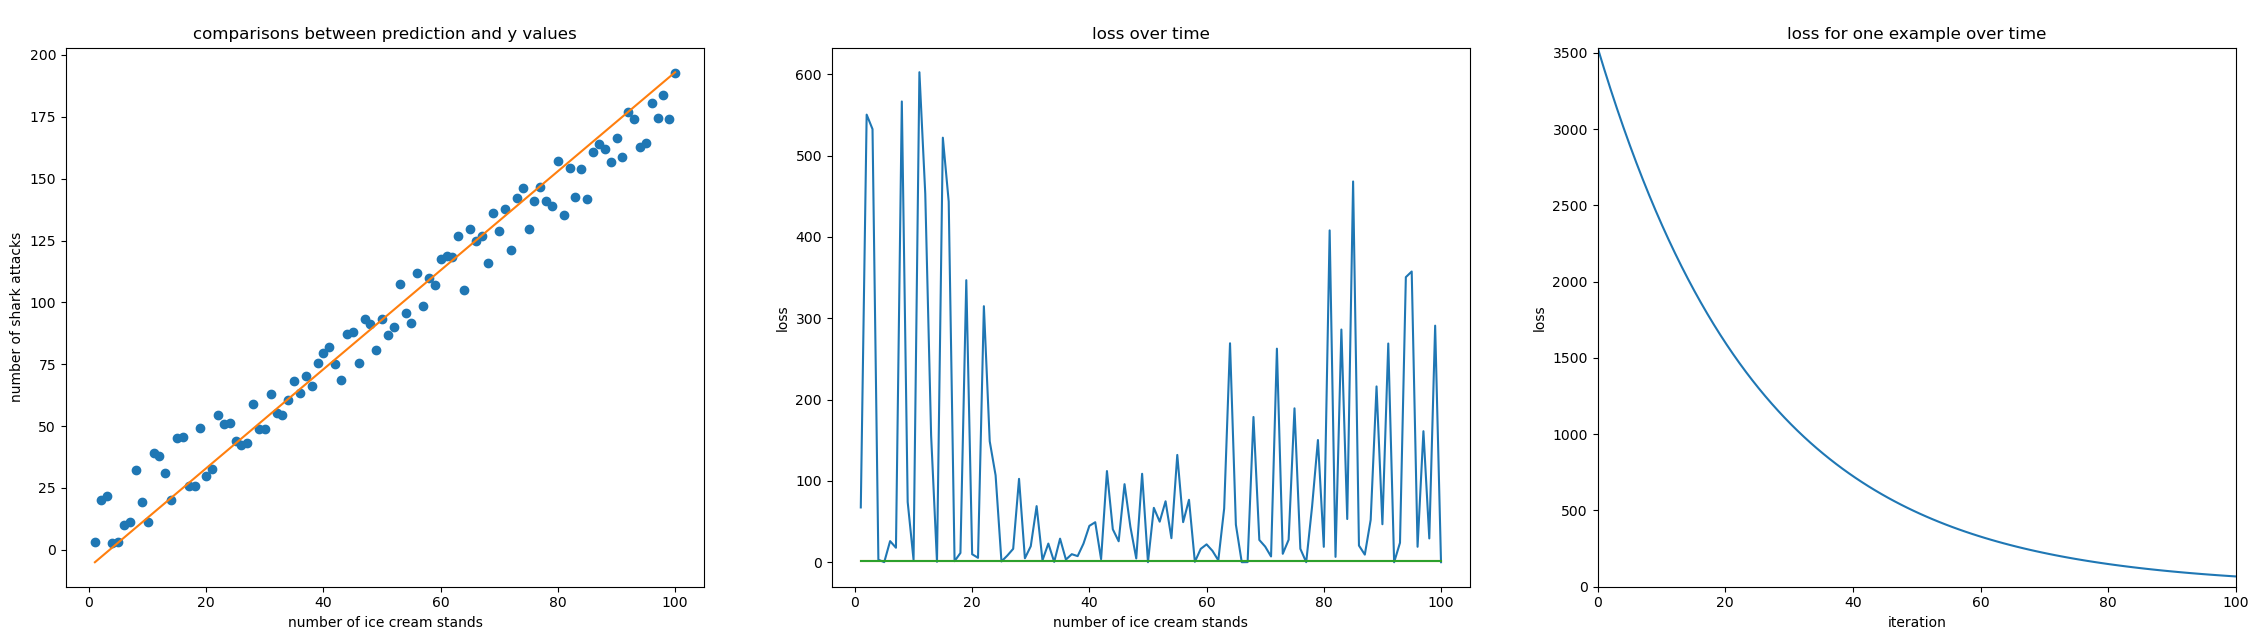

In [12]:
prediction = pred_orig

# compute loss, adjust prediction; loss = (prediction value - actual value) squared

# initialize variables
loss_step = np.ones(100)
loss = np.ones([100,3])
residuals = np.ones([100,3])
learning_rate = 0.99

for num_repeats in range(100):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,0] = (prediction[i] - y[i])**2
        loss_test[0] = loss_test[0] + loss[i,0]
        loss_total[0,0] = loss_total[0,0] + loss[i,0]
        loss_100[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,0] = np.sum(loss[:,0])
# plot graphs: left is prediction vs x, right is loss over time
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax2.plot(x,loss)
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
ax3.plot(np.linspace(0,100,100),loss_100[0,:])
print(loss_100[0,0])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,100)
ax3.set_ylim(0,max(loss_100[0,:]))


It is quite clear that increasing the learning rate directly results in the algorithm performing better. Unfortuntaely, yet again there is a catch. In many machine learning applications, increasing the learning rate by so much can result in some terrible consquences. Let's think about what the learning rate is really doing here - it is scaling the step added to the prediction. If we make the size of the step too big, then the prediction will not end up being correct.

Let's also look at a good example - below this, there is an example with a very large learning rate. Observe the behavior of the algorithm.

3533.202427908342


(0.0, 5.5129176965550565e+256)

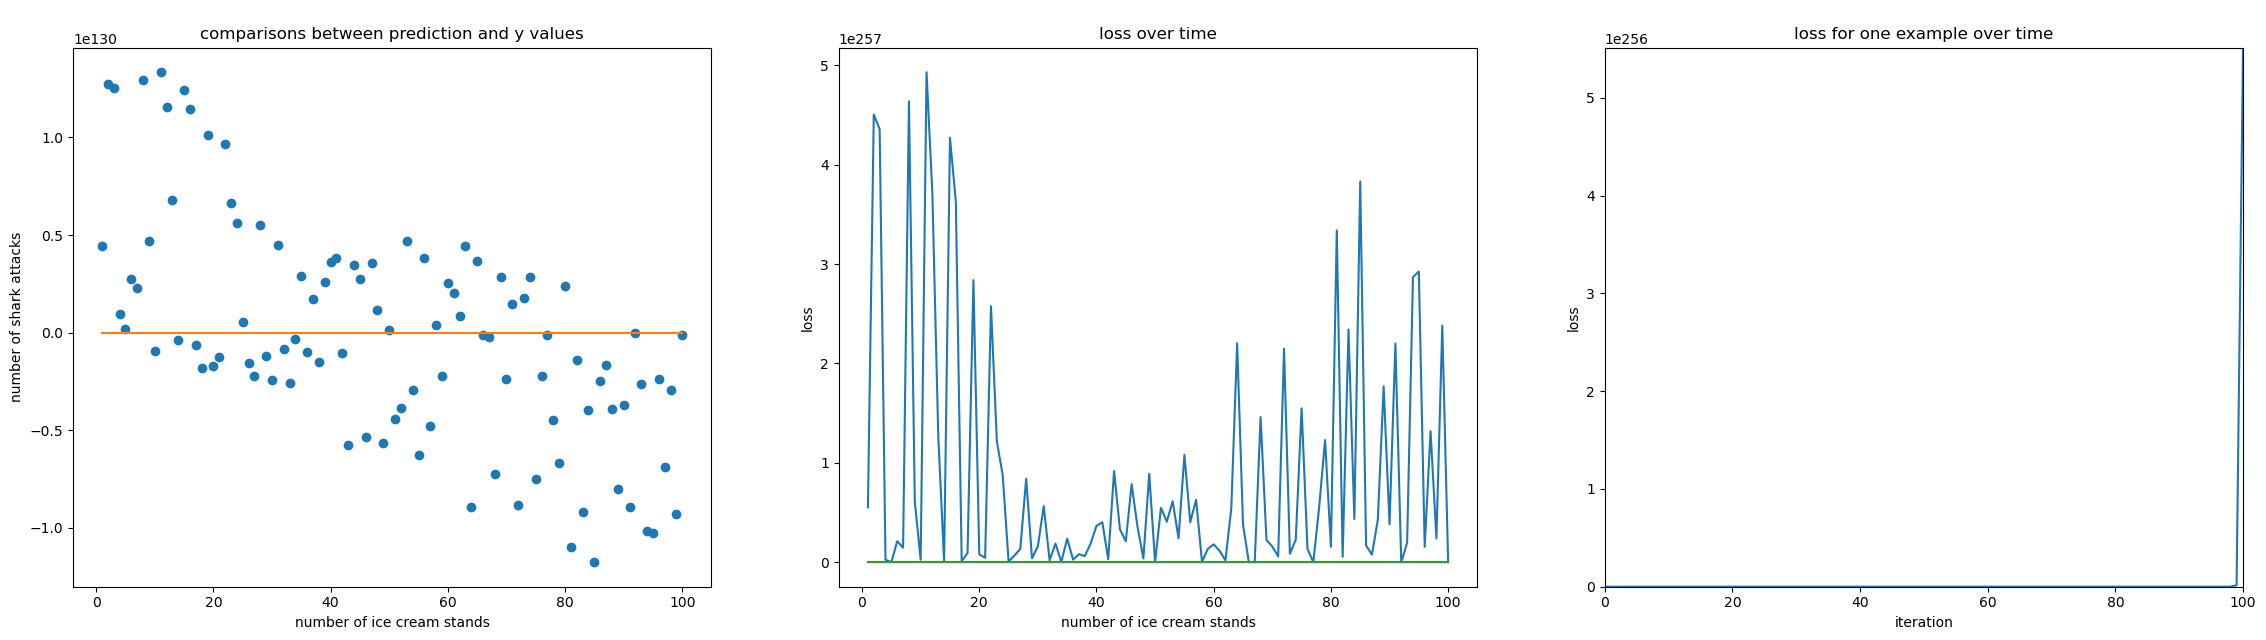

In [13]:
prediction = pred_orig

# compute loss, adjust prediction; loss = (prediction value - actual value) squared

# initialize variables
loss_step = np.ones(100)
loss = np.ones([100,3])
residuals = np.ones([100,3])
learning_rate = 1000 # 1000 is massive for a learning rate!


for num_repeats in range(100):
    for i in range(0,100):
        loss_step[i] = 2 / 100 * (prediction[i] - y[i])
        loss[i,0] = (prediction[i] - y[i])**2
        loss_test[0] = loss_test[0] + loss[i,0]
        loss_total[0,0] = loss_total[0,0] + loss[i,0]
        loss_100[i,num_repeats] = (prediction[i] - y[i])**2
    prediction = -loss_step * learning_rate + prediction

loss_total[0,0] = np.sum(loss[:,0])
# plot graphs: left is prediction vs x, right is loss over time
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(28,7)
ax1.set_xlabel("number of ice cream stands")
ax1.set_ylabel("number of shark attacks")
ax1.plot(x, prediction,'o', x, y)
ax1.set_title('comparisons between prediction and y values')
ax2.plot(x,loss)
ax2.set_title('\nloss over time')
ax2.set_xlabel("number of ice cream stands")
ax2.set_ylabel("loss")
ax3.plot(np.linspace(0,100,100),loss_100[0,:])
print(loss_100[0,0])
ax3.set_title('\nloss for one example over time')
ax3.set_xlabel("iteration")
ax3.set_ylabel("loss")
ax3.set_xlim(0,100)
ax3.set_ylim(0,max(loss_100[0,:]))

Notice how the performance of the algorithm is suddenly quite poor. The predictions are so off that the original line seems almost horizontal in comparison! The loss is also extremely high, with values are just incredibly high. It is quite clear that having a learning rate that is too high will result in poor performance on the part of the algorithm. However, there is obviously a balance that needs to be struck - if the learning rate is too low, then the performance will still not be high enough.

These are the two main parameters to consider when starting with machine learning programs. The amazing thing about machine learning is that once you master this concept, you will start to master a lot of other techniques used in machine learning. Just understanding how these functions work will guide you to understanding intricacies in machine learning algorithms.

Some useful guides:
Stanford Engineering: https://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture3.pdf
